# Configuración del entorno Collab

In [ ]:
## Importar librerias (pandas, numpy, matplotlib, gdrive+mount)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import graphviz

from google.colab import drive

from sklearn.preprocessing import MinMaxScaler # Transformar variables numéricas a min-max entre 0 y 1
from sklearn.preprocessing import OrdinalEncoder # Transformar variables categóricas ordinales
from sklearn.preprocessing import OneHotEncoder # Trasnsformar variables categóricas nominales
from sklearn.linear_model import LogisticRegression # Regresión Logística
from sklearn.linear_model import LinearRegression # Regresión Lineal
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.model_selection import train_test_split # Split Testing
from xgboost import XGBClassifier # XG Boost
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,accuracy_score,precision_score,recall_score # Evaluación Categórica
from sklearn.metrics import mean_squared_error, r2_score # Evaluacion Regresión Lineal Simple y Múltiple
from sklearn.tree import plot_tree # Evaluación Decision Tree y Random Forest
from sklearn.model_selection import GridSearchCV # Hiperparametrización Full
from sklearn.model_selection import RandomizedSearchCV # Hiperparametrización Random

%matplotlib inline
%config IPCompleter.greedy=True
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collect

In [ ]:
# Cargar datos
file_path = '/content/drive/My Drive/BPA/PROYECTO_CURSO/hotel_bookings.csv'
df = pd.read_csv(file_path, sep=',', encoding='latin1')

# Data Quality & Cleaning

In [ ]:
# Verificar headers (en este caso la nomenclatura, snake_case, es consistente, pero la traduciremos al español)
print('headers:', df.columns.tolist())
new_column_names ={
    'hotel': 'hotel',
    'is_canceled': 'cancelado',
    'lead_time': 'tiempo_espera',
    'arrival_date_year': 'ano_fecha_llegada',
    'arrival_date_month': 'mes_fecha_llegada',
    'arrival_date_week_number': 'numero_semana_fecha_llegada',
    'arrival_date_day_of_month': 'dia_del_mes_fecha_llegada',
    'stays_in_weekend_nights': 'estancias_noches_fin_semana',
    'stays_in_week_nights': 'estancias_noches_semana',
    'adults': 'adultos',
    'children': 'ninos',
    'babies': 'bebes',
    'meal': 'comida',
    'country': 'pais',
    'market_segment': 'segmento_mercado',
    'distribution_channel': 'canal_distribucion',
    'is_repeated_guest': 'es_huesped_repetido',
    'previous_cancellations': 'cancelaciones_previas',
    'previous_bookings_not_canceled': 'reservas_anteriores_no_canceladas',
    'reserved_room_type': 'tipo_habitacion_reservada',
    'assigned_room_type': 'tipo_habitacion_asignada',
    'booking_changes': 'cambios_reserva',
    'deposit_type': 'tipo_deposito',
    'agent': 'agente',
    'company': 'empresa',
    'days_in_waiting_list': 'dias_en_lista_espera',
    'customer_type': 'tipo_cliente',
    'adr': 'tarifa_diaria_promedio',
    'required_car_parking_spaces': 'plazas_aparcamiento_solicitadas',
    'total_of_special_requests': 'total_solicitudes_especiales',
    'reservation_status': 'estado_reserva',
    'reservation_status_date': 'fecha_estado_reserva'
}
df = df.rename(columns=new_column_names)
print('despues:', df.columns.tolist())

headers: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']
despues: ['hotel', 'cancelado', 'tiempo_espera', 'ano_fecha_llegada', 'mes_fecha_llegada', 'numero_semana_fecha_llegada', 'dia_del_mes_fecha_llegada', 'estancias_noches_fin_semana', 'estancias_noches_semana', 'adultos', 'ninos', 'bebes', 'comida', 'pais', 'segmento_mercado', 'canal_distribucion', 'es_huesped_repetido', 'cancelaciones_previas', 'reservas_anteriores_no_ca

In [ ]:
#Reemplazar errores tipográficos
df['ninos'] = df['ninos'].replace('NA', 0)
df['ninos'] = df['ninos'].fillna(0)
df['ninos'] = df['ninos'].astype(int)
print(df['ninos'].value_counts())

ninos
0     110800
1       4861
2       3652
3         76
10         1
Name: count, dtype: int64


In [ ]:
# Corregir datatype mismatch
print('antes:', df.dtypes)
df = df.astype({
    'hotel': 'category',
    'cancelado': 'bool',
    'tiempo_espera': 'float64',
    'ano_fecha_llegada': 'int64',
    'mes_fecha_llegada': 'category',
    'numero_semana_fecha_llegada': 'int64',
    'dia_del_mes_fecha_llegada': 'int64',
    'estancias_noches_fin_semana': 'int64',
    'estancias_noches_semana': 'int64',
    'adultos': 'int64',
    'ninos': 'int64',
    'bebes': 'int64',
    'comida': 'category',
    'pais': 'category',
    'segmento_mercado': 'category',
    'canal_distribucion': 'category',
    'es_huesped_repetido': 'bool',
    'cancelaciones_previas': 'int64',
    'reservas_anteriores_no_canceladas': 'int64',
    'tipo_habitacion_reservada': 'category',
    'tipo_habitacion_asignada': 'category',
    'cambios_reserva': 'int64',
    'tipo_deposito': 'category',
    'agente': 'category',
    'empresa': 'category',
    'dias_en_lista_espera': 'int64',
    'tipo_cliente': 'category',
    'tarifa_diaria_promedio': 'float64',
    'plazas_aparcamiento_solicitadas': 'int64',
    'total_solicitudes_especiales': 'int64',
    'estado_reserva': 'category',
    'fecha_estado_reserva': 'datetime64[ns]'
})
print('despues:', df.dtypes)

antes: hotel                                 object
cancelado                              int64
tiempo_espera                          int64
ano_fecha_llegada                      int64
mes_fecha_llegada                     object
numero_semana_fecha_llegada            int64
dia_del_mes_fecha_llegada              int64
estancias_noches_fin_semana            int64
estancias_noches_semana                int64
adultos                                int64
ninos                                  int64
bebes                                  int64
comida                                object
pais                                  object
segmento_mercado                      object
canal_distribucion                    object
es_huesped_repetido                    int64
cancelaciones_previas                  int64
reservas_anteriores_no_canceladas      int64
tipo_habitacion_reservada             object
tipo_habitacion_asignada              object
cambios_reserva                        int64
tip

In [ ]:
## Eliminar filas duplicadas
print('antes:', len(df))
df = df.drop_duplicates()
print('despues:', len(df))

antes: 119390
despues: 87396


In [ ]:
## Eliminar filas nulas con un treshold del 70%
print('antes:', len(df))
df = df.dropna(thresh=0.7 * len(df.columns))
print('despues:', len(df))

antes: 87396
despues: 87396


In [ ]:
## Reemplazar valores nulos según estrategias categóricas
### Reporte de nulos (antes)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
null_counts = df[categorical_cols].isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_report = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
null_report = null_report.sort_values(by=['Null Percentage'], ascending=False)
print('antes:', null_report)

### Eliminar variable con 90% más valores nulos (en este caso: empresa)
columns_to_drop = null_report[null_report['Null Percentage'] > 90].index
df = df.drop(columns=columns_to_drop)

### Reemplazar por la moda
columns = ['pais', 'comida','agente']
for column in columns:
  mode = df[column].mode()[0]
  distinct_count = df[column].nunique()
  print(f"Column: {column}")
  print(f"Mode: {mode}, Distinct Count: {distinct_count}")
  df[column] = df[column].fillna(mode)

### Reporte de nulos (despues)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
null_counts_after = df[categorical_cols].isnull().sum()
null_percentages_after = (null_counts_after / len(df)) * 100
null_report_after = pd.DataFrame({'Null Count': null_counts_after, 'Null Percentage': null_percentages_after})
null_report_after = null_report_after.sort_values(by=['Null Percentage'], ascending=False)
print('despues:', null_report_after)

antes:                            Null Count  Null Percentage
empresa                         82137           93.983
agente                          12193           13.951
pais                              452            0.517
hotel                               0            0.000
mes_fecha_llegada                   0            0.000
segmento_mercado                    0            0.000
comida                              0            0.000
canal_distribucion                  0            0.000
tipo_habitacion_reservada           0            0.000
tipo_deposito                       0            0.000
tipo_habitacion_asignada            0            0.000
tipo_cliente                        0            0.000
estado_reserva                      0            0.000
Column: pais
Mode: PRT, Distinct Count: 177
Column: comida
Mode: BB, Distinct Count: 5
Column: agente
Mode: 9.0, Distinct Count: 333
despues:                            Null Count  Null Percentage
hotel                     

In [ ]:
## Reemplazar valores nulos según estrategias numéricas
### Reporte de nulos (antes)
numerical_cols = df.select_dtypes(include=['number']).columns
null_counts = df[numerical_cols].isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_report = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
null_report = null_report.sort_values(by=['Null Percentage'], ascending=False)
print('antes:', null_report)

# Si todo es 0, imprimir que no es necesario
if null_report['Null Count'].sum() == 0:
    print("No hay valores nulos en columnas numéricas. No es necesario reemplazarlos.")

antes:                                    Null Count  Null Percentage
tiempo_espera                               0            0.000
ano_fecha_llegada                           0            0.000
numero_semana_fecha_llegada                 0            0.000
dia_del_mes_fecha_llegada                   0            0.000
estancias_noches_fin_semana                 0            0.000
estancias_noches_semana                     0            0.000
adultos                                     0            0.000
ninos                                       0            0.000
bebes                                       0            0.000
cancelaciones_previas                       0            0.000
reservas_anteriores_no_canceladas           0            0.000
cambios_reserva                             0            0.000
dias_en_lista_espera                        0            0.000
tarifa_diaria_promedio                      0            0.000
plazas_aparcamiento_solicitadas             0   

In [ ]:
## Grabar datos en un pickle y CSV general, una categórico y uno numérico

### Datos generales
df.to_pickle('/content/drive/My Drive/BPA/PROYECTO_CURSO/clean_general-hotel_bookings.pkl')
df.to_csv('/content/drive/My Drive/BPA/PROYECTO_CURSO/clean_general-hotel_bookings.csv', index=False)

### Datos categóricos + datetime
df_categorical = df.select_dtypes(include=['category', 'datetime64[ns]'])
df_categorical.to_pickle('/content/drive/My Drive/BPA/PROYECTO_CURSO/clean_categorical-hotel_bookings.pkl')

### Datos numéricos
df_numerical = df.select_dtypes(include=['number', 'bool'])
df_numerical.to_pickle('/content/drive/My Drive/BPA/PROYECTO_CURSO/clean_numerical-hotel_bookings.pkl')

# Data Transformation

In [ ]:
# Eliminar variables post-cancelación que alterarían el resultado del modelo
df = df.drop(columns=['estado_reserva', 'fecha_estado_reserva','agente'], errors='ignore')

# Dividir variables según su tipo
df_categorical = df.select_dtypes(include=['category', 'datetime64[ns]'])
df_numerical = df.select_dtypes(include=['number', 'bool'])

In [ ]:
# Transformar variables categóricas nominales a varias columnas binarias 0 , 1 - OneHotEncoder
columnas = ['hotel','comida','pais','segmento_mercado','canal_distribucion','tipo_habitacion_reservada','tipo_habitacion_asignada','tipo_deposito','tipo_cliente']
oneHE = OneHotEncoder(sparse_output  = False, drop='first', dtype='int64')
df_oneHE = oneHE.fit_transform(df[columnas])

df_oneHE = pd.DataFrame(data = df_oneHE , columns=oneHE.get_feature_names_out()) #input_features=cat))
df_oneHE.head()

,hotel_Resort Hotel,comida_FB,comida_HB,comida_SC,comida_Undefined,pais_AGO,pais_AIA,pais_ALB,pais_AND,pais_ARE,pais_ARG,pais_ARM,pais_ASM,pais_ATA,pais_ATF,pais_AUS,pais_AUT,pais_AZE,pais_BDI,pais_BEL,pais_BEN,pais_BFA,pais_BGD,pais_BGR,pais_BHR,pais_BHS,pais_BIH,pais_BLR,pais_BOL,pais_BRA,pais_BRB,pais_BWA,pais_CAF,pais_CHE,pais_CHL,pais_CHN,pais_CIV,pais_CMR,pais_CN,pais_COL,pais_COM,pais_CPV,pais_CRI,pais_CUB,pais_CYM,pais_CYP,pais_CZE,pais_DEU,pais_DJI,pais_DMA,pais_DNK,pais_DOM,pais_DZA,pais_ECU,pais_EGY,pais_ESP,pais_EST,pais_ETH,pais_FIN,pais_FJI,pais_FRA,pais_FRO,pais_GAB,pais_GBR,pais_GEO,pais_GGY,pais_GHA,pais_GIB,pais_GLP,pais_GNB,pais_GRC,pais_GTM,pais_GUY,pais_HKG,pais_HND,pais_HRV,pais_HUN,pais_IDN,pais_IMN,pais_IND,pais_IRL,pais_IRN,pais_IRQ,pais_ISL,pais_ISR,pais_ITA,pais_JAM,pais_JEY,pais_JOR,pais_JPN,pais_KAZ,pais_KEN,pais_KHM,pais_KIR,pais_KNA,pais_KOR,pais_KWT,pais_LAO,pais_LBN,pais_LBY,pais_LCA,pais_LIE,pais_LKA,pais_LTU,pais_LUX,pais_LVA,pais_MAC,pais_MAR,pais_MCO,pais_MDG,pais_MDV,pais_MEX,pais_MKD,pais_MLI,pais_MLT,pais_MMR,pais_MNE,pais_MOZ,pais_MRT,pais_MUS,pais_MWI,pais_MYS,pais_MYT,pais_NAM,pais_NCL,pais_NGA,pais_NIC,pais_NLD,pais_NOR,pais_NPL,pais_NZL,pais_OMN,pais_PAK,pais_PAN,pais_PER,pais_PHL,pais_PLW,pais_POL,pais_PRI,pais_PRT,pais_PRY,pais_PYF,pais_QAT,pais_ROU,pais_RUS,pais_RWA,pais_SAU,pais_SDN,pais_SEN,pais_SGP,pais_SLE,pais_SLV,pais_SMR,pais_SRB,pais_STP,pais_SUR,pais_SVK,pais_SVN,pais_SWE,pais_SYC,pais_SYR,pais_TGO,pais_THA,pais_TJK,pais_TMP,pais_TUN,pais_TUR,pais_TWN,pais_TZA,pais_UGA,pais_UKR,pais_UMI,pais_URY,pais_USA,pais_UZB,pais_VEN,pais_VGB,pais_VNM,pais_ZAF,pais_ZMB,pais_ZWE,segmento_mercado_Complementary,segmento_mercado_Corporate,segmento_mercado_Direct,segmento_mercado_Groups,segmento_mercado_Offline TA/TO,segmento_mercado_Online TA,segmento_mercado_Undefined,canal_distribucion_Direct,canal_distribucion_GDS,canal_distribucion_TA/TO,canal_distribucion_Undefined,tipo_habitacion_reservada_B,tipo_habitacion_reservada_C,tipo_habitacion_reservada_D,tipo_habitacion_reservada_E,tipo_habitacion_reservada_F,tipo_habitacion_reservada_G,tipo_habitacion_reservada_H,tipo_habitacion_reservada_L,tipo_habitacion_reservada_P,tipo_habitacion_asignada_B,tipo_habitacion_asignada_C,tipo_habitacion_asignada_D,tipo_habitacion_asignada_E,tipo_habitacion_asignada_F,tipo_habitacion_asignada_G,tipo_habitacion_asignada_H,tipo_habitacion_asignada_I,tipo_habitacion_asignada_K,tipo_habitacion_asignada_L,tipo_habitacion_asignada_P,tipo_deposito_Non Refund,tipo_deposito_Refundable,tipo_cliente_Group,tipo_cliente_Transient,tipo_cliente_Transient-Party
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Transformar variables categóricas ordinarias a 1,2,3,4... - OrdinalEncoder
columnas = ['mes_fecha_llegada']
categorias_mes_fecha_llegada = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordEN= OrdinalEncoder(categories=[categorias_mes_fecha_llegada], dtype='int64')
df_ordEN = ordEN.fit_transform(df[columnas])

df_ordEN = pd.DataFrame(df_ordEN, columns = columnas)
df_ordEN.head()

,mes_fecha_llegada
0,6
1,6
2,6
3,6
4,6


In [ ]:
# Transformar variables numéricas (dis o con) a min-max entre 0 y 1 - MinMaxScaler
columnas = ['tiempo_espera','ano_fecha_llegada','numero_semana_fecha_llegada','dia_del_mes_fecha_llegada','estancias_noches_fin_semana','estancias_noches_semana','adultos','ninos','bebes','es_huesped_repetido','cancelaciones_previas','reservas_anteriores_no_canceladas','cambios_reserva','dias_en_lista_espera','tarifa_diaria_promedio','plazas_aparcamiento_solicitadas','total_solicitudes_especiales']
mms = MinMaxScaler()
mms.fit(df[columnas])
df_mms = mms.transform(df[columnas])
df_mms = pd.DataFrame(data=df_mms, columns=columnas)
df_mms.head()

,tiempo_espera,ano_fecha_llegada,numero_semana_fecha_llegada,dia_del_mes_fecha_llegada,estancias_noches_fin_semana,estancias_noches_semana,adultos,ninos,bebes,es_huesped_repetido,cancelaciones_previas,reservas_anteriores_no_canceladas,cambios_reserva,dias_en_lista_espera,tarifa_diaria_promedio,plazas_aparcamiento_solicitadas,total_solicitudes_especiales
0,0.464,0.000,0.500,0.000,0.000,0.000,0.036,0.000,0.000,0.000,0.000,0.000,0.143,0.000,0.001,0.000,0.000
1,1.000,0.000,0.500,0.000,0.000,0.000,0.036,0.000,0.000,0.000,0.000,0.000,0.190,0.000,0.001,0.000,0.000
2,0.009,0.000,0.500,0.000,0.000,0.020,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000,0.000
3,0.018,0.000,0.500,0.000,0.000,0.020,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000,0.000
4,0.019,0.000,0.500,0.000,0.000,0.040,0.036,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019,0.000,0.200


In [ ]:
# Transformar target a su propia columna
df_target = df['cancelado'].astype(int)
df_target.head()

,cancelado
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Unir todas las columnas transformadas
df = pd.concat([df_oneHE, df_ordEN, df_mms, df_target], axis=1).dropna()
df.head()

,hotel_Resort Hotel,comida_FB,comida_HB,comida_SC,comida_Undefined,pais_AGO,pais_AIA,pais_ALB,pais_AND,pais_ARE,pais_ARG,pais_ARM,pais_ASM,pais_ATA,pais_ATF,pais_AUS,pais_AUT,pais_AZE,pais_BDI,pais_BEL,pais_BEN,pais_BFA,pais_BGD,pais_BGR,pais_BHR,pais_BHS,pais_BIH,pais_BLR,pais_BOL,pais_BRA,pais_BRB,pais_BWA,pais_CAF,pais_CHE,pais_CHL,pais_CHN,pais_CIV,pais_CMR,pais_CN,pais_COL,pais_COM,pais_CPV,pais_CRI,pais_CUB,pais_CYM,pais_CYP,pais_CZE,pais_DEU,pais_DJI,pais_DMA,pais_DNK,pais_DOM,pais_DZA,pais_ECU,pais_EGY,pais_ESP,pais_EST,pais_ETH,pais_FIN,pais_FJI,pais_FRA,pais_FRO,pais_GAB,pais_GBR,pais_GEO,pais_GGY,pais_GHA,pais_GIB,pais_GLP,pais_GNB,pais_GRC,pais_GTM,pais_GUY,pais_HKG,pais_HND,pais_HRV,pais_HUN,pais_IDN,pais_IMN,pais_IND,pais_IRL,pais_IRN,pais_IRQ,pais_ISL,pais_ISR,pais_ITA,pais_JAM,pais_JEY,pais_JOR,pais_JPN,pais_KAZ,pais_KEN,pais_KHM,pais_KIR,pais_KNA,pais_KOR,pais_KWT,pais_LAO,pais_LBN,pais_LBY,pais_LCA,pais_LIE,pais_LKA,pais_LTU,pais_LUX,pais_LVA,pais_MAC,pais_MAR,pais_MCO,pais_MDG,pais_MDV,pais_MEX,pais_MKD,pais_MLI,pais_MLT,pais_MMR,pais_MNE,pais_MOZ,pais_MRT,pais_MUS,pais_MWI,pais_MYS,pais_MYT,pais_NAM,pais_NCL,pais_NGA,pais_NIC,pais_NLD,pais_NOR,pais_NPL,pais_NZL,pais_OMN,pais_PAK,pais_PAN,pais_PER,pais_PHL,pais_PLW,pais_POL,pais_PRI,pais_PRT,pais_PRY,pais_PYF,pais_QAT,pais_ROU,pais_RUS,pais_RWA,pais_SAU,pais_SDN,pais_SEN,pais_SGP,pais_SLE,pais_SLV,pais_SMR,pais_SRB,pais_STP,pais_SUR,pais_SVK,pais_SVN,pais_SWE,pais_SYC,pais_SYR,pais_TGO,pais_THA,pais_TJK,pais_TMP,pais_TUN,pais_TUR,pais_TWN,pais_TZA,pais_UGA,pais_UKR,pais_UMI,pais_URY,pais_USA,pais_UZB,pais_VEN,pais_VGB,pais_VNM,pais_ZAF,pais_ZMB,pais_ZWE,segmento_mercado_Complementary,segmento_mercado_Corporate,segmento_mercado_Direct,segmento_mercado_Groups,segmento_mercado_Offline TA/TO,segmento_mercado_Online TA,segmento_mercado_Undefined,canal_distribucion_Direct,canal_distribucion_GDS,canal_distribucion_TA/TO,canal_distribucion_Undefined,tipo_habitacion_reservada_B,tipo_habitacion_reservada_C,tipo_habitacion_reservada_D,tipo_habitacion_reservada_E,tipo_habitacion_reservada_F,tipo_habitacion_reservada_G,tipo_habitacion_reservada_H,tipo_habitacion_reservada_L,tipo_habitacion_reservada_P,tipo_habitacion_asignada_B,tipo_habitacion_asignada_C,tipo_habitacion_asignada_D,tipo_habitacion_asignada_E,tipo_habitacion_asignada_F,tipo_habitacion_asignada_G,tipo_habitacion_asignada_H,tipo_habitacion_asignada_I,tipo_habitacion_asignada_K,tipo_habitacion_asignada_L,tipo_habitacion_asignada_P,tipo_deposito_Non Refund,tipo_deposito_Refundable,tipo_cliente_Group,tipo_cliente_Transient,tipo_cliente_Transient-Party,mes_fecha_llegada,tiempo_espera,ano_fecha_llegada,numero_semana_fecha_llegada,dia_del_mes_fecha_llegada,estancias_noches_fin_semana,estancias_noches_semana,adultos,ninos,bebes,es_huesped_repetido,cancelaciones_previas,reservas_anteriores_no_canceladas,cambios_reserva,dias_en_lista_espera,tarifa_diaria_promedio,plazas_aparcamiento_solicitadas,total_solicitudes_especiales,cancelado
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [ ]:
# Grabar datos en un pickle y CSV general, una categórico y uno numérico
df.to_pickle('/content/drive/My Drive/BPA/PROYECTO_CURSO/transformed-hotel_bookings.pkl')
df.to_csv('/content/drive/My Drive/BPA/PROYECTO_CURSO/transformed-hotel_bookings.csv', index=False)

# Data Modeling

In [ ]:
# DEFINIR FUNCION PARA EVALUAR MÉTRICAS DE CLASIFICACIÓN
# Realizar y mostrar la matriz de confusión, así como las métricas de evaluación de cada modelo.
def evaluar_model(y_test, y_predicted, model_name="Model"):
    print(f"\n\n======= {model_name} - EVAL =======\n\n")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print(f"Confusion Matrix for {model_name}:")
    print(pd.DataFrame(conf_matrix, columns=['Prediccion NO', 'Prediccion SI'], index=['Real NO', 'Real SI']))

    TN = conf_matrix[0][0] # True Negatives
    FP = conf_matrix[0][1] # False Positives
    FN = conf_matrix[1][0] # False Negatives
    TP = conf_matrix[1][1] # True Positives
    print('TN:', TN, 'FP:', FP, 'FN:', FN, 'TP:', TP, sep=' ; ')

    plt.figure(figsize=(4, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Prediccion NO', 'Prediccion SI'], yticklabels=['Real NO', 'Real SI'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    roc_auc = roc_auc_score(y_test, y_predicted)
    es_TNR = (TN) / (TN + FP)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"TNR: {es_TNR:.3f}")

In [ ]:
# Separar variables dependientes de independientes
x = df.drop(columns = ['cancelado'])
y = df['cancelado']

# Separar datos para testing y para modeling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

## Decision Tree

[0. 0. 0. ... 1. 0. 0.]


======= DECISION TREE - EVAL =======


Confusion Matrix for DECISION TREE:
         Prediccion NO  Prediccion SI
Real NO           5992           1342
Real SI           2301           2509
TN: ; 5992 ; FP: ; 1342 ; FN: ; 2301 ; TP: ; 2509


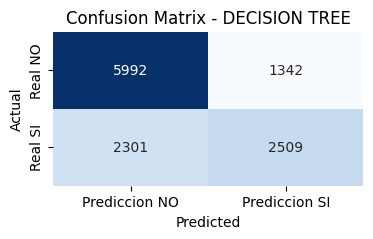

Accuracy: 0.700
Precision: 0.652
Recall: 0.522
F1-score: 0.579
ROC AUC: 0.669
TNR: 0.817


In [ ]:
# Decision Tree
# Entrenar el modelo
model_dt = DecisionTreeClassifier(criterion = 'gini', max_depth=3) # Decision Tree
model_dt.fit(x_train,y_train)
y_predicted = model_dt.predict(x_test)
print(y_predicted)
# Evaluar el modelo
evaluar_model(y_test, y_predicted, model_name="DECISION TREE")

## Random Forest

[0. 0. 0. ... 1. 0. 0.]


======= RANDOM FOREST - EVAL =======


Confusion Matrix for RANDOM FOREST:
         Prediccion NO  Prediccion SI
Real NO           6469            865
Real SI           1727           3083
TN: ; 6469 ; FP: ; 865 ; FN: ; 1727 ; TP: ; 3083


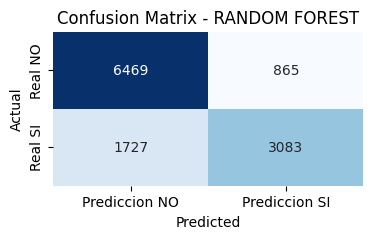

Accuracy: 0.787
Precision: 0.781
Recall: 0.641
F1-score: 0.704
ROC AUC: 0.762
TNR: 0.882


In [ ]:
# Random Forest
# Entrenar el modelo
model_rf = RandomForestClassifier() # Random Forest
model_rf.fit(x_train,y_train)
y_predicted = model_rf.predict(x_test)
print(y_predicted)
# Evaluar el modelo
evaluar_model(y_test, y_predicted, model_name="RANDOM FOREST")

## XGB Classifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0 0 0 ... 1 0 0]


======= XGB CLASSIFIER - EVAL =======


Confusion Matrix for XGB CLASSIFIER:
         Prediccion NO  Prediccion SI
Real NO           6466            868
Real SI           1591           3219
TN: ; 6466 ; FP: ; 868 ; FN: ; 1591 ; TP: ; 3219


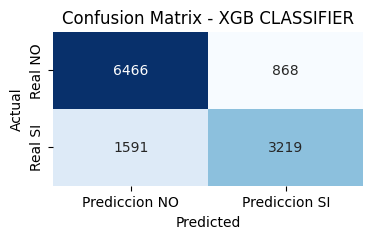

Accuracy: 0.798
Precision: 0.788
Recall: 0.669
F1-score: 0.724
ROC AUC: 0.775
TNR: 0.882


In [ ]:
# XGB Classifier
# Entrenar el modelo
model_xgb = XGBClassifier(eval_metric="auc", use_label_encoder=False) # XG Boost
model_xgb.fit(x_train,y_train)
y_predicted = model_xgb.predict(x_test)
print(y_predicted)
# Evaluar el modelo
evaluar_model(y_test, y_predicted, model_name="XGB CLASSIFIER")

## KNN

[0. 0. 0. ... 1. 0. 0.]


======= KNN - EVAL =======


Confusion Matrix for KNN:
         Prediccion NO  Prediccion SI
Real NO           5822           1512
Real SI           2084           2726
TN: ; 5822 ; FP: ; 1512 ; FN: ; 2084 ; TP: ; 2726


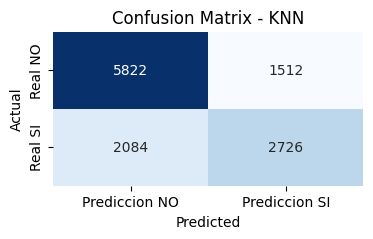

Accuracy: 0.704
Precision: 0.643
Recall: 0.567
F1-score: 0.603
ROC AUC: 0.680
TNR: 0.794


In [ ]:
# KNN
# Entrenar el modelo
model_knn = KNeighborsClassifier(n_neighbors = 5) # KNN
model_knn.fit(x_train,y_train)
y_predicted = model_knn.predict(x_test)
print(y_predicted)
# Evaluar el modelo
evaluar_model(y_test, y_predicted, model_name="KNN")

## Hiperparametrización (del modelo XGB Classifier)
Basado en las métricas de evaluación, el XGB Classifier demostró el mejor rendimiento general entre los modelos probados,
logrando la mayor exactitud (0.796), precisión (0.787), recall (0.664), F1-score (0.720) y ROC AUC (0.773).
Dado su desempeño superior, procederemos con la hiperparametrización de este modelo para optimizar aún más su rendimiento.

In [ ]:
if False: # El IF False está para no correr este código por default. Toma +10 minutos y se corrió en un entorno personal (PC WINDOWS) y no en Collab por limitaciones técnicas de la herramienta.
    print("\n\n======= Hiperparametrización vía Random Search (XGBoost) =======\n\n")
    # Crear la parrilla para el randomized search
    grid_parameters = {
        'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
        'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
        'max_depth': [3, 5, 7],  # Profundidad máxima de cada árbol
        'subsample': [0.7, 0.8, 1.0],  # Fracción de muestras a utilizar para ajustar los estimadores base
        'colsample_bytree': [0.7, 0.8, 1.0], # Fracción de características a muestrear por árbol
        'gamma': [0, 0.1, 0.2], # Reducción mínima de pérdida requerida para hacer una partición
        'reg_alpha': [0, 0.005, 0.1], # Regularización L1
        'reg_lambda': [1, 0.5, 0.1] # Regularización L2
    }

    grid_search_xgb = RandomizedSearchCV(
        estimator=model_xgb,
        param_distributions=grid_parameters,
        n_iter=75, # 75 combinaciones aleatorias
        scoring='roc_auc', # Métrica de evaluación para el grid search
        cv=3, # Número de folds para la validación cruzada
        verbose=0, # Nivel de verbosidad (2 muestra más detalles)
        n_jobs=-1, # Usar todos los núcleos disponibles para acelerar el proceso
        random_state=42,
    )

    grid_search_xgb.fit(x_train, y_train)

    print("Mejores parámetros encontrados por Random Search:",grid_search_xgb.best_params_)
    print("Mejor ROC AUC score encontrado por Random Search:",grid_search_xgb.best_score_)

Mejores parámetros encontrados por Random Search:
*   `subsample`: 0.8
*   `reg_lambda`: 0.5
*   `reg_alpha`: 0
*   `n_estimators`: 200
*   `max_depth`: 7
*   `learning_rate`: 0.1
*   `gamma`: 0
*   `colsample_bytree`: 0.8

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0 0 0 ... 1 0 0]


======= XGBOOST HIPERPARAMETRIZADO - EVAL =======


Confusion Matrix for XGBOOST HIPERPARAMETRIZADO:
         Prediccion NO  Prediccion SI
Real NO           6490            844
Real SI           1557           3253
TN: ; 6490 ; FP: ; 844 ; FN: ; 1557 ; TP: ; 3253


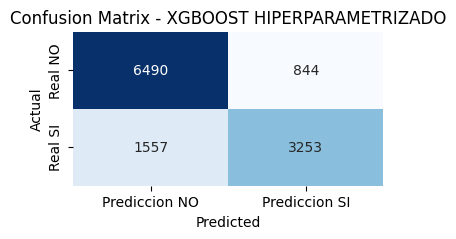

Accuracy: 0.802
Precision: 0.794
Recall: 0.676
F1-score: 0.730
ROC AUC: 0.781
TNR: 0.885


In [ ]:
# XGB con los mejores parámetros - HIPERPARAMETRIZADO
# Entrenar el modelo
best_xgb_model = XGBClassifier(
    subsample=0.8,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42
)
best_xgb_model.fit(x_train, y_train)
y_predicted = best_xgb_model.predict(x_test)
print(y_predicted)
# Evaluar el modelo
evaluar_model(y_test, y_predicted, model_name="XGBOOST HIPERPARAMETRIZADO")